# 강남역 맛집 리뷰로 알아보는 감성분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### [카카오맵 리뷰 크롤링]

In [4]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time

# 크롬 드라이버 위치
path = 'C:\\Users\\rladl\\Jupyter.study\\driver\\chromedriver'

# 윈도우용 크롬 웹드라이버 실행 경로
excutable_path = 'chromedriver.exe'

# 크롤링할 사이트 주소 정의
source_url = 'https://map.kakao.com/'

# 크롬 드라이버 사용
driver = webdriver.Chrome(path)

# 카카오 지도에 접속
driver.get(source_url)

# 검색창에 검색어를 찾은 후, 검색어 입력
searchbox = driver.find_element_by_xpath('//*[@id="search.keyword.query"]')
searchbox.send_keys("강남역 고기집")

# 검색버튼을 눌러서 결과를 가져오기
searchbutton = driver.find_element_by_xpath('//*[@id="search.keyword.submit"]')
driver.execute_script("arguments[0].click();", searchbutton)

# 검색 결과를 가져올 시간 기다리기
time.sleep(2)

# 검색 결과의 페이지 소스를 가져오기
html = driver.page_source

# Beautifulsoup을 이용하여 html 정보를 파싱하기
soup = BeautifulSoup(html, "html.parser")
moreviews = soup.find_all(name='a', attrs={"class":"moreview"}) # 상세보기 버튼

# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성한다.
page_urls = []
for moreview in moreviews:
    page_url = moreview.get('href')
    print(page_url)
    page_urls.append(page_url)

# 크롬브라우저 종료
driver.close()

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\2652852456.py:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\2652852456.py:22: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  searchbox = driver.find_element_by_xpath('//*[@id="search.keyword.query"]')
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\2652852456.py:26: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  searchbutton = driver.find_element_by_xpath('//*[@id="search.keyword.submit"]')


https://place.map.kakao.com/95713992
https://place.map.kakao.com/1503746075
https://place.map.kakao.com/741391811
https://place.map.kakao.com/2011092566
https://place.map.kakao.com/1648266796
https://place.map.kakao.com/168079537
https://place.map.kakao.com/27238067
https://place.map.kakao.com/1052874675
https://place.map.kakao.com/263830255
https://place.map.kakao.com/1511737742
https://place.map.kakao.com/1780387311
https://place.map.kakao.com/1111006760
https://place.map.kakao.com/12997393
https://place.map.kakao.com/1907052666
https://place.map.kakao.com/27511865


In [7]:
print(page_urls)
page_urls.pop(3)
print(page_urls)

['https://place.map.kakao.com/95713992', 'https://place.map.kakao.com/1503746075', 'https://place.map.kakao.com/741391811', 'https://place.map.kakao.com/2011092566', 'https://place.map.kakao.com/1648266796', 'https://place.map.kakao.com/168079537', 'https://place.map.kakao.com/27238067', 'https://place.map.kakao.com/1052874675', 'https://place.map.kakao.com/263830255', 'https://place.map.kakao.com/1511737742', 'https://place.map.kakao.com/1780387311', 'https://place.map.kakao.com/1111006760', 'https://place.map.kakao.com/12997393', 'https://place.map.kakao.com/1907052666', 'https://place.map.kakao.com/27511865']
['https://place.map.kakao.com/95713992', 'https://place.map.kakao.com/1503746075', 'https://place.map.kakao.com/741391811', 'https://place.map.kakao.com/1648266796', 'https://place.map.kakao.com/168079537', 'https://place.map.kakao.com/27238067', 'https://place.map.kakao.com/1052874675', 'https://place.map.kakao.com/263830255', 'https://place.map.kakao.com/1511737742', 'https:/

In [9]:
from tqdm import tqdm_notebook
columns = ['score', 'review']
df = pd.DataFrame(columns=columns)

driver = webdriver.Chrome(path)
for page_url in tqdm_notebook(page_urls):
    
    # 상세보기 페이지에 접속
    driver.get(page_url)
    time.sleep(2)
    
    # 첫 페이지 리뷰를 크롤링
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    # 리뷰 박스 파싱
    contents_div = soup.find(name='div', attrs={'class':'evaluation_review'})
    
    if (soup.find(name='span', attrs={'class':'txt_blind'})):
        continue
    
    # 별점 가져오기
    rates = contents_div.find_all(name='em', attrs={'class':'num_rate'})
    
    # 리뷰 가져오기
    reviews = contents_div.find_all(name='p', attrs={'class':'txt_comment'})
    
    for rate, review in zip(rates, reviews):
        row = [rate.text[0], review.find(name='span').text]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
    
    # 2-5 페이지의 리뷰를 크롤링
    for button_num in range(2,6):
        
        # 오류가 나는 경우, 수행하지 않기
        try:
            another_reviews = driver.find_element_by_xpath("//a[@data-page='" + str(button_num) + "']")
            another_reviews.click()
            time.sleep(2)
            
            # 페이지 리뷰를 크롤링합니다
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            contents_div = soup.find(name="div", attrs={"class":"evaluation_review"})

            # 별점을 가져옵니다.
            rates = contents_div.find_all(name="em", attrs={"class":"num_rate"})

            # 리뷰를 가져옵니다.
            reviews = contents_div.find_all(name="p", attrs={"class":"txt_comment"})

            for rate, review in zip(rates, reviews):
                row = [rate.text[0], review.find(name="span").text]
                series = pd.Series(row, index=df.columns)
                df = df.append(series, ignore_index=True)
        except:
            break    
driver.close()

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page_url in tqdm_notebook(page_urls):


  0%|          | 0/14 [00:00<?, ?it/s]

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppDa

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppDa

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppDa

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppDa

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppDa

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppDa

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppDa

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:37: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  another_reviews = driver.find_element_by_xpath("//a[@data-page='" + str(button_n

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppDa

C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_18448\1017872211.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\rladl\AppDa

In [10]:
# 4점 이상의 리뷰는 긍정 리뷰, 3점 이하의 리뷰는 부정 리뷰로 평가
df['y'] = df['score'].apply(lambda x: 1 if float(x) > 3 else 0)
print(df.shape)
df.head()

(285, 3)


,score,review,y
0,1,친절은 기대도 하지 마세요....진짜 말을 어덯게....화가 나네요,0
1,1,"돈이 너무 많아서 주체가 안 되면 가세요.... 고기에서 반지하 물 냄새, 닭냄새가...",0
2,1,다른데 1인분이 여기 2인분임 ㅋㅋ 가격도 비싸고 알바생들 노느라 서비스 엉망임. ...,0
3,1,옛날에 장인닭갈비 정말 맛있었는데ㅠ 이제는 닭도 덜 익은데다가 양념도 너무 과하게 ...,0
4,1,초심잃었습니다.. 제가알던 장인은 어디가고 아마추어 닭갈비가 되어버린 안타까운 식...,0


In [11]:
df.to_csv('review_data.csv', index=False)

## TF-IDF를 이용한 핵심어 추출
### [형태소 추출하기]
한글 텍스트로 전처리

In [2]:
df = pd.read_csv('review_data.csv')
df.head()

,score,review,y
0,1,친절은 기대도 하지 마세요....진짜 말을 어덯게....화가 나네요,0
1,1,"돈이 너무 많아서 주체가 안 되면 가세요.... 고기에서 반지하 물 냄새, 닭냄새가...",0
2,1,다른데 1인분이 여기 2인분임 ㅋㅋ 가격도 비싸고 알바생들 노느라 서비스 엉망임. ...,0
3,1,옛날에 장인닭갈비 정말 맛있었는데ㅠ 이제는 닭도 덜 익은데다가 양념도 너무 과하게 ...,0
4,1,초심잃었습니다.. 제가알던 장인은 어디가고 아마추어 닭갈비가 되어버린 안타까운 식...,0


In [3]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    # 한글의 정규표현식으로 한글만 추출합니다.
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', str(text))
    return result

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   285 non-null    int64 
 1   review  231 non-null    object
 2   y       285 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.8+ KB


In [5]:
# 함수를 적용하여 리뷰에서 한글만 추출합니다.
df['ko_text'] = df['review'].apply(lambda x: text_cleaning(x))
del df['review']

# 한 글자 이상의 텍스트를 가지고 있는 데이터만 추출합니다
df = df[df['ko_text'].str.len() > 0]
df.head()

,score,y,ko_text
0,1,0,친절은 기대도 하지 마세요진짜 말을 어덯게화가 나네요
1,1,0,돈이 너무 많아서 주체가 안 되면 가세요 고기에서 반지하 물 냄새 닭냄새가 섞인 냄...
2,1,0,다른데 인분이 여기 인분임 ㅋㅋ 가격도 비싸고 알바생들 노느라 서비스 엉망임 제대로...
3,1,0,옛날에 장인닭갈비 정말 맛있었는데ㅠ 이제는 닭도 덜 익은데다가 양념도 너무 과하게 ...
4,1,0,초심잃었습니다 제가알던 장인은 어디가고 아마추어 닭갈비가 되어버린 안타까운 식사였...


형태소 단위로 추출

In [6]:
from konlpy.tag import Okt

# konlypy 라이브러리로 텍스트 데이터에서 형태소를 추출
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word, tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트
result = get_pos(df['ko_text'].values[0])
print(result)

['친절/Noun', '은/Josa', '기대도/Verb', '하지/Verb', '마세요/Verb', '진짜/Noun', '말/Noun', '을/Josa', '어덯게화/Noun', '가/Josa', '나네요/Verb']


### [분류 모델의 학습 데이터로 변환하기]
corpus index 생성하기

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(x 데이터) 으로 변환
index_vectorizer = CountVectorizer(tokenizer = lambda x :get_pos(x))
x = index_vectorizer.fit_transform(df['ko_text'].tolist())

In [8]:
x.shape

(230, 2072)

In [9]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'친절/Noun': 1831, '은/Josa': 1440, '기대도/Verb': 280, '하지/Verb': 1966, '마세요/Verb': 624, '진짜/Noun': 1745..


In [10]:
print(df['ko_text'].values[0])
print(x[0])

친절은 기대도 하지 마세요진짜 말을 어덯게화가 나네요
  (0, 1831)	1
  (0, 1440)	1
  (0, 280)	1
  (0, 1966)	1
  (0, 624)	1
  (0, 1745)	1
  (0, 659)	1
  (0, 1441)	1
  (0, 1279)	1
  (0, 17)	1
  (0, 342)	1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 284
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   score    230 non-null    int64 
 1   y        230 non-null    int64 
 2   ko_text  230 non-null    object
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


TF-IDF로 변환

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋 (x 데이터)로 변환
tfidf_vectorizer = TfidfTransformer()
x = tfidf_vectorizer.fit_transform(x)

In [13]:
print(x.shape)
print(x[0])

(230, 2072)
  (0, 1966)	0.3208578482672262
  (0, 1831)	0.3547711724127507
  (0, 1745)	0.21954413243754248
  (0, 1441)	0.21954413243754248
  (0, 1440)	0.160467172350986
  (0, 1279)	0.3816896921604434
  (0, 659)	0.24792181506438546
  (0, 624)	0.3547711724127507
  (0, 342)	0.3816896921604434
  (0, 280)	0.3816896921604434
  (0, 17)	0.15700259993975038


## 긍정 부정 리뷰 분류하기
### [분류 모델링]

데이터셋 분리

In [14]:
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(161, 2072)
(69, 2072)
(161,)
(69,)


Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 로지스틱 회귀 모델을 학습
lr = LogisticRegression(random_state=112)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 로지스틱 회귀모델의 성능을 평가
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.57
Precision : 0.552
Recall : 1.000
F1 : 0.712


In [16]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 2 30]
 [ 0 37]]


AUC : 0.878


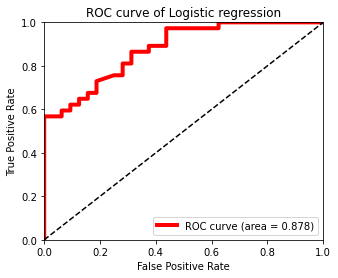

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC를 계산합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프를 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

## 중요 키워드 분석
### [회귀 모델의 피처 영향력 추출]

<BarContainer object of 2072 artists>

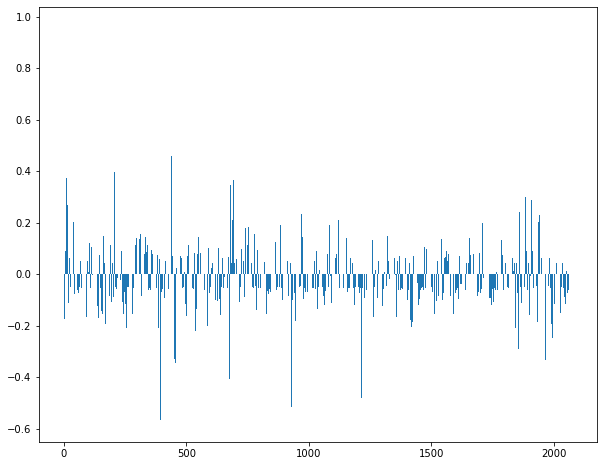

In [19]:
# 학습한 회귀 모델의 계수를 출력
plt.rcParams['figure.figsize'] = [10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [20]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

[(0.960928305645294, 683), (0.710063386534153, 691), (0.599884788846977, 1657), (0.5871320878456474, 1671), (0.5817613947526128, 675)]
[(-0.4881259029350141, 1636), (-0.5151445529204262, 929), (-0.5311281793396356, 17), (-0.5650403317646786, 394), (-0.57450692538119, 1454)]


### [중요 피처의 형태소]

In [21]:
# 회귀 모델의 계수를 높은 순으로 정렬
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)

In [22]:
# 회귀 모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력하게끔한다.
invert_index_vectorizer = {v: k for k,v in index_vectorizer.vocabulary_.items()}

# 계수가 높은 순으로, 피처에 형태소를 맵핑한 결과를 출력한다. 계수가 높은 피처는 리뷰에 긍정적인 영향을 끼친다고 할 수 있다.
print(str(invert_index_vectorizer)[:100]+'..')

{1831: '친절/Noun', 1440: '은/Josa', 280: '기대도/Verb', 1966: '하지/Verb', 624: '마세요/Verb', 1745: '진짜/Noun'..


In [23]:
# 상위 20개 긍정 형태소를 출력
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

맛있어요/Adjective 0.960928305645294
맛있음/Adjective 0.710063386534153
존맛/Noun 0.599884788846977
좋아요/Adjective 0.5871320878456474
맛있네요/Adjective 0.5817613947526128
맛/Noun 0.5252108731910674
잘/Verb 0.46647461330199314
맛있다/Adjective 0.46565585193447234
님/Suffix 0.4574172984187604
맛있습니다/Adjective 0.43902795021256513
도/Josa 0.430036737567788
고깃집/Noun 0.4099865037784755
구워주시고/Verb 0.39549449962893535
추천/Noun 0.3751505115618294
ㅎㅎ/KoreanParticle 0.37258231351038396
맛집/Noun 0.3655590236054548
맛있당/Adjective 0.3474691978500547
된장찌개/Noun 0.32917910305219183
다/Adverb 0.32887318204675575
친절함/Adjective 0.327918078031153


In [24]:
# 상위 20개 부정 형태소를 출력
for coef in coef_pos_index[-20:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

요/Josa -0.377957195754333
식당/Noun -0.388076424375454
만/Josa -0.3976899285664456
곳/Noun -0.4006523586281667
없음/Adjective -0.40298876716677323
맛있는/Adjective -0.408457258551624
알바생/Noun -0.42509342202392536
없고/Adjective -0.4336059073189949
말/Noun -0.4444298840937781
임/Noun -0.45063834304339473
로/Josa -0.4561692193418434
하고/Josa -0.461914121203636
괜찮았어/Adjective -0.4779746864014033
그냥/Noun -0.4796384576988425
안/VerbPrefix -0.4805369260493303
정도/Noun -0.4881259029350141
분/Noun -0.5151445529204262
가/Josa -0.5311281793396356
너무/Adverb -0.5650403317646786
이/Noun -0.57450692538119


### [품사별 긍정 / 부정 형태소 탐색하기]

In [25]:
noun_list = []
adjective_list = []

# 명사, 형용사별로 계수가 높은 상위 10개의 형태소를 추출

for coef in coef_pos_index[:100]:
    pos_category = invert_index_vectorizer[coef[1]].split('/')[1]
    if pos_category == "Noun":
        noun_list.append((invert_index_vectorizer[coef[1]], coef[0]))
    elif pos_category == "Adjective":
        adjective_list.append((invert_index_vectorizer[coef[1]], coef[0]))

In [26]:
noun_list[:10]

[('존맛/Noun', 0.599884788846977),
 ('맛/Noun', 0.5252108731910674),
 ('고깃집/Noun', 0.4099865037784755),
 ('추천/Noun', 0.3751505115618294),
 ('맛집/Noun', 0.3655590236054548),
 ('된장찌개/Noun', 0.32917910305219183),
 ('최고/Noun', 0.32230064432378913),
 ('편/Noun', 0.2897323247323717),
 ('모/Noun', 0.278408898759001),
 ('치즈/Noun', 0.2701421092521351)]

In [27]:
adjective_list[:10]

[('맛있어요/Adjective', 0.960928305645294),
 ('맛있음/Adjective', 0.710063386534153),
 ('좋아요/Adjective', 0.5871320878456474),
 ('맛있네요/Adjective', 0.5817613947526128),
 ('맛있다/Adjective', 0.46565585193447234),
 ('맛있습니다/Adjective', 0.43902795021256513),
 ('맛있당/Adjective', 0.3474691978500547),
 ('친절함/Adjective', 0.327918078031153),
 ('괜찮음/Adjective', 0.327918078031153),
 ('맛있고/Adjective', 0.3033613486293601)]

In [46]:
import re
def test(s):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣+]') # 한글과 띄어쓰기를 제외한 모든 글자
    result = hangul.sub('', s) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
    return(result)
    
s='''韓子는 싫고, 한글은 nice하다. E


nglish 쵝오 -_-ㅋㅑㅋㅑ ./?!'''
print(test(s))

는 싫고 한글은 하다  쵝오 ㅋㅑㅋㅑ 
